_1.1 Уменьшение уровней яркости_  

In [1]:
%matplotlib inline
from skimage.io import imread, imsave, imshow
from skimage import color
import numpy as np

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/axes/_base.py:1324: MatplotlibDeprecationWarning: 
box-forced
  "2.2", "box-forced", obj_type="keyword argument")


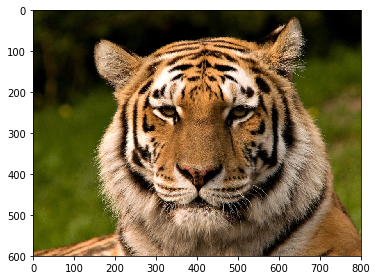

In [2]:
img = imread('image.jpg')
imshow(img)

In [5]:
entropy(img)

17.683519601936965

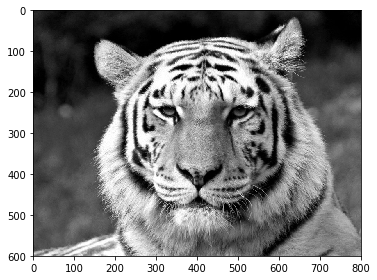

In [3]:
# переводим исходную картинку в greyscale

grey_img = img[:, :, 0]
imshow(grey_img)
imsave('grey_image.jpg', grey_img)

In [7]:
entropy(grey_img)

7.872478441978623

In [4]:
def low_bright(img, level):
    
    low_img = (np.round(img / level) * level).astype('uint8')
    imsave('low_bright_image_'+str(level)+'_.jpg', low_img)
    imshow(low_img)
    
    return(low_img)

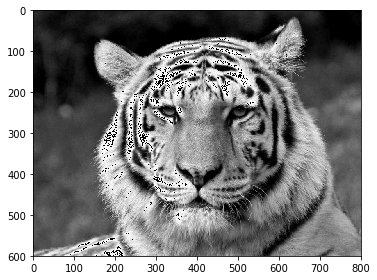

In [5]:
low_fi = low_bright(grey_img, 4)

In [10]:
entropy(low_fi)

5.833466030920617

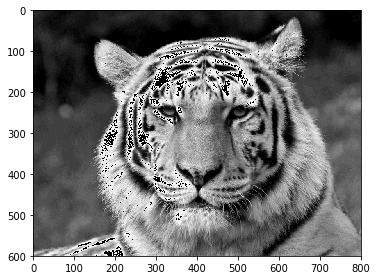

In [6]:
low_fi = low_bright(grey_img, 8)

In [12]:
entropy(low_fi)

4.880609728575601

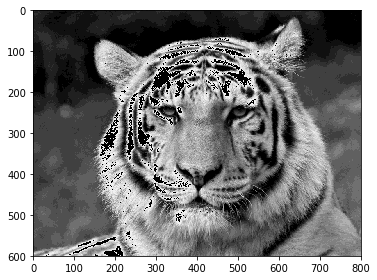

In [7]:
low_fi = low_bright(grey_img, 16)

In [14]:
entropy(low_fi)

3.903819556732562

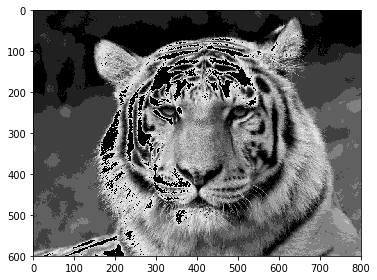

In [8]:
low_fi = low_bright(grey_img, 32)

In [16]:
entropy(low_fi)

2.941574749744696

In [17]:
mse(grey_img, low_fi)

8.42905478587803

_1.2 RGB2YUV. Децимация цветоразностных каналов._

In [9]:
def rgb2yuv(img):
    
    x_form = np.array([[.299, .587, .114], [-.1687, -.3313, .5], [.5, -.4187, -.0813]])
    y_cbcr = img.dot(x_form.T)
    y_cbcr[:, :, [1, 2]] += 128
    
    return y_cbcr.astype('uint8')

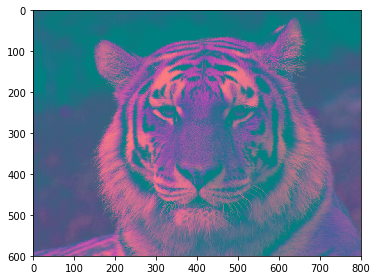

In [10]:
yuv_img = rgb2yuv(img)
imsave('yuv_image.jpg', yuv_img)
imshow(yuv_img)

In [20]:
print('Entropy of original image:', entropy(img))
print('Entropy of yuv image:', entropy(yuv_img))

Entropy of original image: 17.683519601936965
Entropy of yuv image: 16.255425848503755


In [11]:
def yuv2rgb(img):
    
    x_form = np.array([[1, 0, 1.402], [1, -0.34414, -0.71414], [1, 1.772, 0]])
    rgb = img.astype(np.float)
    rgb[:, :, [1,2]] -= 128
    rgb = rgb.dot(x_form.T)
    np.putmask(rgb, rgb > 255, 255)
    np.putmask(rgb, rgb < 0, 0) 

    return rgb.astype('uint8')

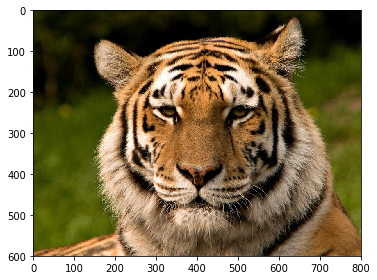

In [26]:
rgb_img = yuv2rgb(dec_yuv_img)
imshow(rgb_img)

In [27]:
print('Entropy of yuv image:', entropy(yuv_img))
print('Entropy of rgb image:', entropy(rgb_img))

Entropy of yuv image: 16.255425848503755
Entropy of rgb image: 17.388205991958156


In [28]:
print('MSE of the original image from the decoded:', mse(img, rgb_img))

MSE of the original image from the decoded: 4.290696330434024


In [12]:
def decimation(img):

    y, u, v = img[:, :, 0], img[:, :, 1], img[:, :, 2] 

    new_u = np.array([np.array([px for j, px in enumerate(row) if j % 2]) for i, row in enumerate(u) if i % 2])
    new_v = np.array([np.array([px for j, px in enumerate(row) if j % 2]) for i, row in enumerate(v) if i % 2])
    
    u, v = new_u, new_v 
    
    new_u = np.array(np.repeat([np.repeat([px for px in row], 2) for row in new_u], 2, axis=0))
    new_v = np.array(np.repeat([np.repeat([px for px in row], 2) for row in new_v], 2, axis=0))
    
    new_img = np.dstack((y, new_u, new_v))
    
    return new_img.astype('uint8'), u.astype('uint8'), v.astype('uint8')

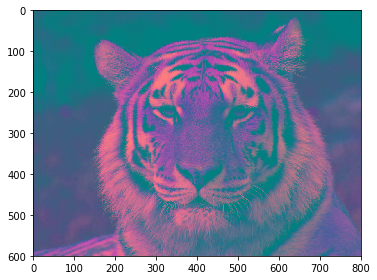

In [13]:
dec_yuv_img, dec_u_img, dec_v_img = decimation(yuv_img)
imshow(dec_yuv_img)
imsave('dec_yuv_image.jpg', dec_yuv_img)

In [20]:
print('Entropy of yuv-image after decimation:', entropy(yuv_img))

Entropy of yuv-image after decimation: 16.255425848503755


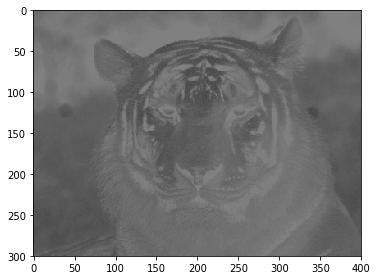

In [14]:
imshow(dec_u_img)
imsave('dec_u_image.jpg', dec_u_img)

In [19]:
print('Entropy of u-channel:', entropy(dec_u_img))

Entropy of u-channel: 5.464027216017929


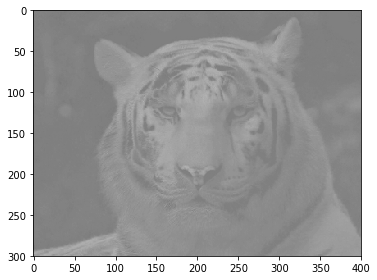

In [15]:
imshow(dec_v_img)
imsave('dec_v_image.jpg', dec_v_img)

In [18]:
print('Entropy of v-channel:', entropy(dec_v_img))

Entropy of v-channel: 4.866707708342853


_1.3 Энтромия и MSE_

In [16]:
def entropy(img):
    
    freq = np.array([0 for i in range(256)])
    
    for row in img:
        for px in row:
            freq[px] += 1   
    
    n = len(img) * len(img[0])
    freq = freq / n
    ent = -np.sum([p * np.log2(p) for p in freq if p != 0])
    
    return ent 

In [17]:
def mse(img_0, img_1):
    return np.sqrt(np.sum([(px_0 - px_1) ** 2 for px_0, px_1 in zip(img_0[:,:], img_1[:,:])]) / len(img_1) / len(img_1[0]))